In [330]:
import numpy as np
import matplotlib.pyplot as plt

In [331]:
N = 10000
t0 = 0.0
tf = 20
t = np.linspace(t0, tf, N)
dt = t[1] - t[0]

In [332]:
t_1 = np.zeros(N) #angulo do pendulo 1, varia com o tempo
t_2 = np.zeros(N) #angulo do pendulo 2, varia com o tempo

v_1 = np.zeros(N) #velocidade angular do pendulo 1, varia com o tempo, é a primeira derivada de t_1
v_2 = np.zeros(N) #velocidade angular do pendulo 2, varia com o tempo, é a primeira derivada de t_2

#Condicoes iniciais
t_1[0] = np.pi/2
v_1[0] = 0.0
t_2[0] = np.pi/3
v_2[0] = 0.0

In [333]:
m1 = 1.5 #massa do pendulo 1, cte
m2 = 1.5 #massa do pendulo 2, cte

l1 = 3 #comprimento da haste do primeiro pendulo, cte
l2 = 3 #comprimento da haste do segundo pendulo, cte

g = 9.81 #aceleracao da gravidade, cte

In [334]:
for n in range(N - 1):
    numerador_t_1 = -1*g*(2*m1 + m2)*np.sin(t_1[n]) - m2*g*np.sin(t_1[n]-2*t_2[n]) - 2*np.sin(t_1[n]-t_2[n])*m2*((v_2[n]**2)*l2 + (v_1[n]**2)*l1*np.cos(t_1[n] - t_2[n]))
    denominador_t_1 = l1*(2*m1 + m2 - m2*np.cos(2*t_1[n] - 2*t_2[n]))

    numerador_t_2 = 2*np.sin(t_1[n] - t_2[n])*(v_1[n]**2*l1*(m1+m2) + g*(m1+m2)*np.cos(t_1[n]) + v_2[n]**2*l2*m2*np.cos(t_1[n] - t_2[n]))
    denominador_t_2 = l2*(2*m1 + m2 - m2*np.cos(2*t_1[n] - 2*t_2[n]))

    t_1[n + 1] = t_1[n] + dt * v_1[n]
    v_1[n + 1] = v_1[n] + dt * (numerador_t_1 / denominador_t_1)
    t_2[n + 1] = t_2[n] + dt * v_2[n]
    v_2[n + 1] = v_2[n] + dt * (numerador_t_2 / denominador_t_2)

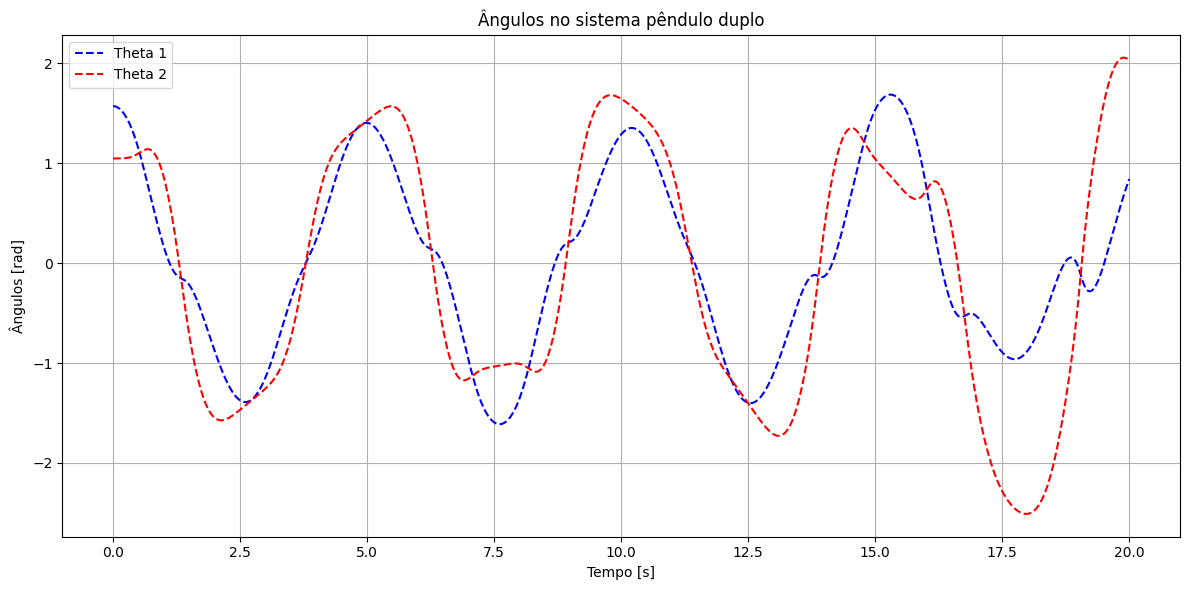

In [335]:
plt.figure(figsize=(12, 6))
plt.plot(t, t_1,'--b', label='Theta 1')
plt.plot(t, t_2,'--r', label='Theta 2')
plt.xlabel('Tempo [s]')
plt.ylabel('Ângulos [rad]')
plt.title('Ângulos no sistema pêndulo duplo')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

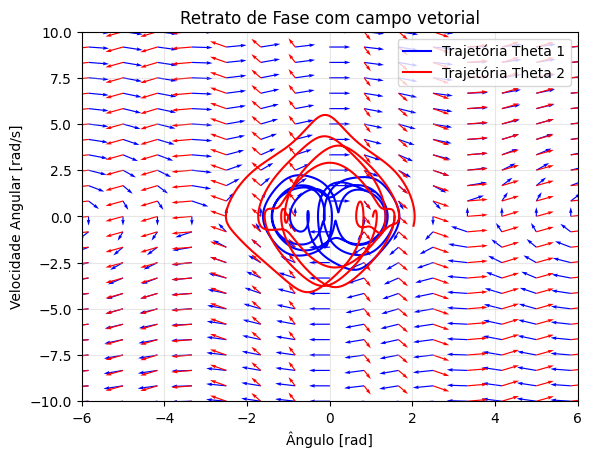

In [336]:
def vector_field_theta1(T1, V1, T2, V2):
    numerador_t_1 = -1*g*(2*m1 + m2)*np.sin(T1) - m2*g*np.sin(T1-2*T2) - 2*np.sin(T1-T2)*m2*((V2**2)*l2 + (V1**2)*l1*np.cos(T1 - T2))
    denominador_t_1 = l1*(2*m1 + m2 - m2*np.cos(2*T1 - 2*T2))

    dtheta1dt = V1
    dvang1dt = numerador_t_1/denominador_t_1
    return dtheta1dt, dvang1dt

def vector_field_theta2(T1, V1, T2, V2):
    numerador_t_2 = 2*np.sin(T1 - T2)*(V1**2*l1*(m1+m2) + g*(m1+m2)*np.cos(T1) + V2**2*l2*m2*np.cos(T1[n] - T2[n]))
    denominador_t_2 = l2*(2*m1 + m2 - m2*np.cos(2*T1 - 2*T2))

    dtheta2dt = V2
    dvang2dt = numerador_t_2/denominador_t_2
    return dtheta2dt, dvang2dt

t_1_vals = np.linspace(-10, 10, 25)
v_1_vals = np.linspace(-10, 10, 25)
t_2_vals = np.linspace(-10, 10, 25)
v_2_vals = np.linspace(-10, 10, 25)

T_1, V_1 = np.meshgrid(t_1_vals, v_1_vals)
T_2, V_2 = np.meshgrid(t_2_vals, v_2_vals)

dtheta1dt, dvang1dt = vector_field_theta1(T_1, V_1, t_2_vals, v_2_vals)
dtheta2dt, dvang2dt = vector_field_theta1(t_1_vals, v_2_vals, T_2, V_2)

magnitudes_theta1 = np.sqrt(dtheta1dt**2 + dvang1dt**2)
magnitudes_theta1[magnitudes_theta1 == 0] = 1
dtheta1dt_norm = dtheta1dt / magnitudes_theta1
dvang1dt_norm = dvang1dt / magnitudes_theta1

magnitudes_theta2 = np.sqrt(dtheta2dt**2 + dvang2dt**2)
magnitudes_theta2[magnitudes_theta2 == 0] = 1
dtheta2dt_norm = dtheta2dt / magnitudes_theta2
dvang2dt_norm = dvang2dt / magnitudes_theta2


plt.quiver(T_1, V_1, dtheta1dt_norm, dvang1dt_norm, 
           color = 'blue', angles = 'xy', scale_units = 'xy', scale = 2)
plt.quiver(T_2, V_2, dtheta2dt_norm, dvang2dt_norm, 
           color = 'red', angles = 'xy', scale_units = 'xy', scale = 2)

#Plotando somente trajetória
plt.plot(t_1, v_1, 'b', linewidth = 1.5, label='Trajetória Theta 1')
plt.plot(t_2, v_2, 'r', linewidth = 1.5, label='Trajetória Theta 2')

plt.xlabel('Ângulo [rad]')
plt.ylabel('Velocidade Angular [rad/s]')
plt.title('Retrato de Fase com campo vetorial')
plt.legend()
plt.grid(True, alpha = 0.3)
plt.xlim([-6, 6])
plt.ylim([-10, 10])
plt.show()

#plt.tight_layout()

#plt.figure(figsize=(12, 4))

#plt.plot(t, t_1, 'b-', linewidth=2, label='Posição x(t)')
#plt.plot(t, v_1, 'r--', linewidth=2, label='Velocidade v(t)')
#plt.xlabel('Tempo (s)')
#plt.ylabel('Posição (m) / Velocidade (m/s)')
#plt.title('Resposta Temporal do Sistema')
#plt.grid(True, alpha=0.3)
#plt.legend()

#plt.tight_layout()
#plt.show()